# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url= f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ostrovnoy
Processing Record 2 of Set 1 | bumba
Processing Record 3 of Set 1 | methoni
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | quang ngai
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | nyimba
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | tornio
Processing Record 14 of Set 1 | nowy sacz
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | hambantota
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | sitka
Processing Record 22 o

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.0531,39.5131,1.21,92,9,3.24,RU,1681822234
1,bumba,2.1833,22.4667,34.03,40,100,0.61,CD,1681822682
2,methoni,36.8197,21.7049,19.56,66,9,4.18,GR,1681822683
3,punta arenas,-53.1500,-70.9167,7.06,81,0,11.32,CL,1681822134
4,quang ngai,15.1167,108.8000,24.23,89,100,2.48,VN,1681822685


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ostrovnoy,68.0531,39.5131,1.21,92,9,3.24,RU,1681822234
1,bumba,2.1833,22.4667,34.03,40,100,0.61,CD,1681822682
2,methoni,36.8197,21.7049,19.56,66,9,4.18,GR,1681822683
3,punta arenas,-53.1500,-70.9167,7.06,81,0,11.32,CL,1681822134
4,quang ngai,15.1167,108.8000,24.23,89,100,2.48,VN,1681822685


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

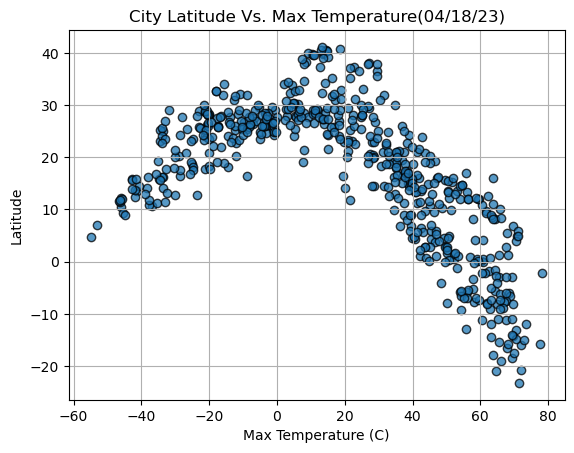

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Max Temperature (C)")
plt.ylabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

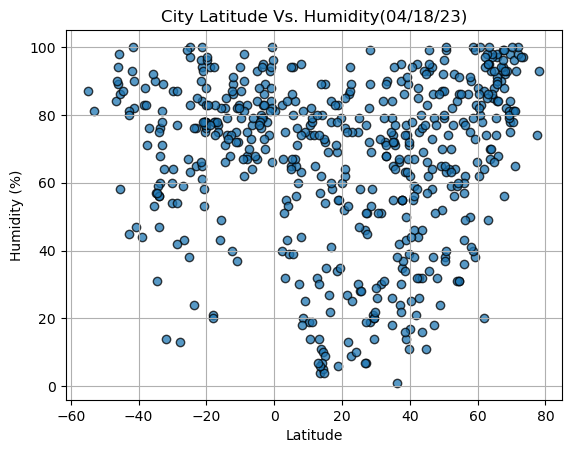

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

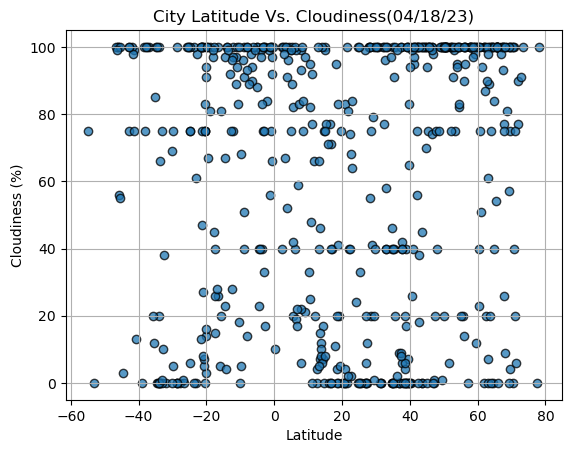

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

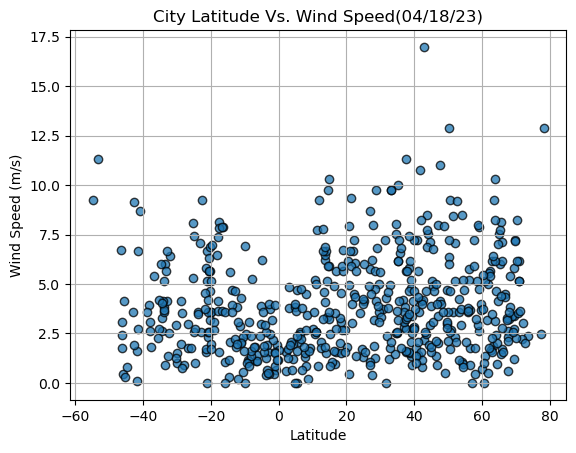

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis,y_axis,title,text_coordinates):
    
  
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
 
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")

    plt.show()


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ostrovnoy,68.0531,39.5131,1.21,92,9,3.24,RU,1681822234
1,bumba,2.1833,22.4667,34.03,40,100,0.61,CD,1681822682
2,methoni,36.8197,21.7049,19.56,66,9,4.18,GR,1681822683
4,quang ngai,15.1167,108.8000,24.23,89,100,2.48,VN,1681822685
5,georgetown,5.4112,100.3354,27.96,94,20,0.00,MY,1681821911


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,punta arenas,-53.1500,-70.9167,7.06,81,0,11.32,CL,1681822134
6,nyimba,-14.5566,30.8149,24.18,71,97,0.30,ZM,1681822686
7,port alfred,-33.5906,26.8910,25.10,76,0,0.89,ZA,1681822169
9,ushuaia,-54.8000,-68.3000,4.81,87,75,9.26,AR,1681822688
10,busselton,-33.6500,115.3333,14.09,68,0,6.02,AU,1681822113


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8694008818927349


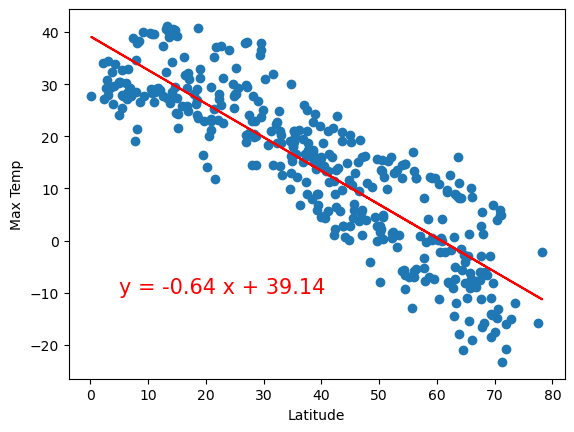

In [44]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df ["Lat"]
y_axis = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_axis,y_axis, 'Max Temp', (5,-10))

The r-value is: 0.7487154440622462


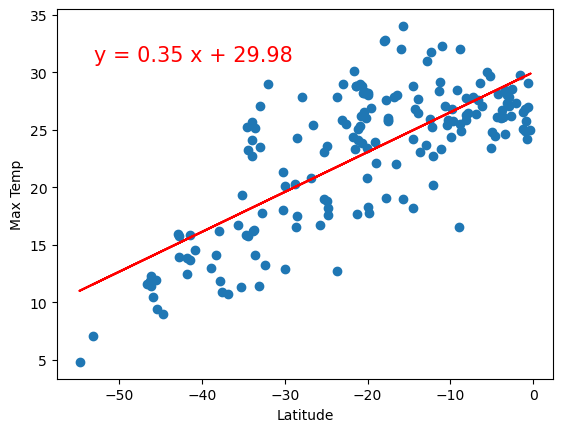

In [47]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df ["Lat"]
y_axis = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_axis,y_axis, 'Max Temp', (-53,31))

**Discussion about the linear relationship:** There is a strong correlation between latitude and temperature both in Northern Hemisphere and Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37951614582204496


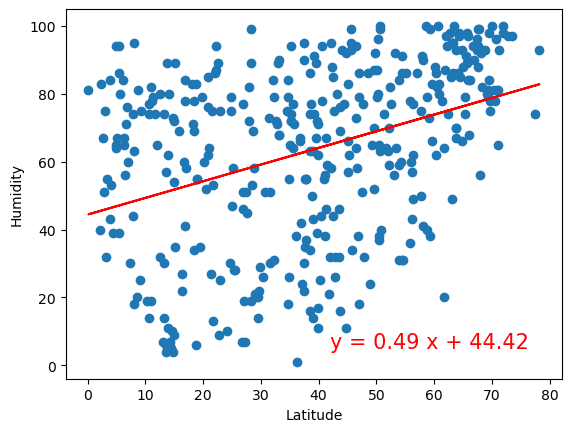

In [48]:
# Northern Hemisphere
x_axis = northern_hemi_df ["Lat"]
y_axis = northern_hemi_df ["Humidity"]
plot_linear_regression(x_axis,y_axis, 'Humidity', (42,5))

The r-value is: 0.13488813928549048


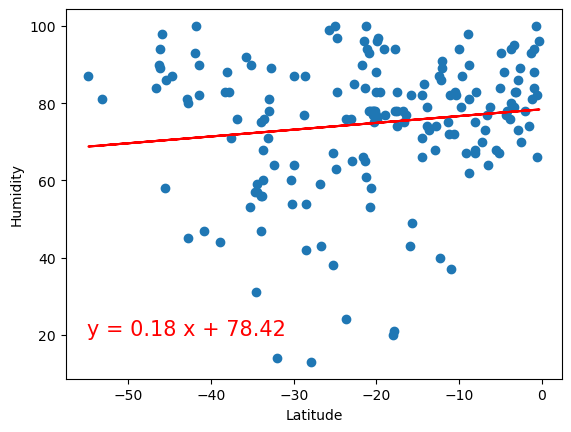

In [51]:
# Southern Hemisphere
x_axis = southern_hemi_df ["Lat"]
y_axis = southern_hemi_df ["Humidity"]
plot_linear_regression(x_axis,y_axis, 'Humidity', (-55,20))

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity both in Northern Hemisphere and Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23368119078223423


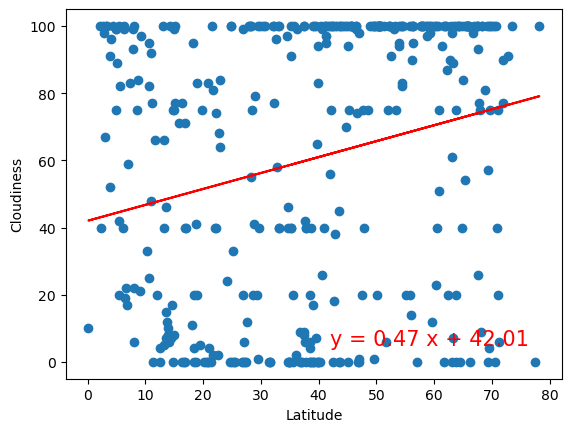

In [52]:
# Northern Hemisphere
x_axis = northern_hemi_df ["Lat"]
y_axis = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_axis,y_axis, 'Cloudiness', (42,5))

The r-value is: 0.20030663270105328


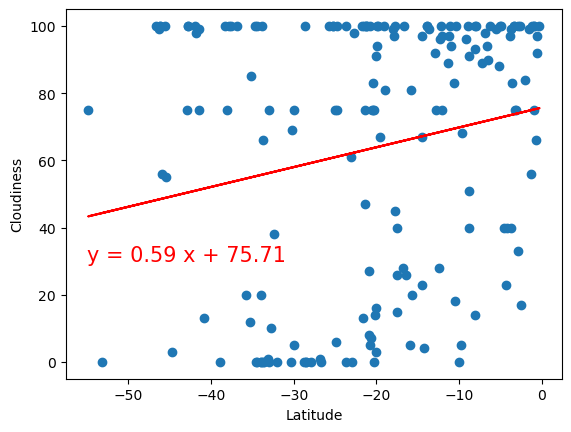

In [54]:
# Southern Hemisphere
x_axis = southern_hemi_df ["Lat"]
y_axis = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_axis,y_axis, 'Cloudiness', (-55,30))

**Discussion about the linear relationship:** There is a weak correlation between latitude and cloudiness both in Northern Hemisphere and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11360040463092179


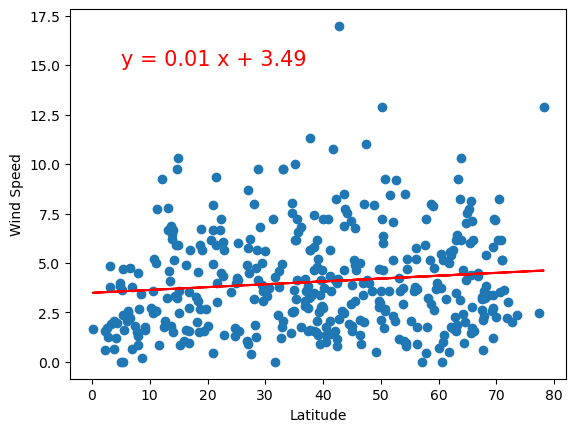

In [56]:
# Northern Hemisphere
x_axis = northern_hemi_df ["Lat"]
y_axis = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_axis,y_axis, 'Wind Speed', (5,15))

The r-value is: -0.3001079082906205


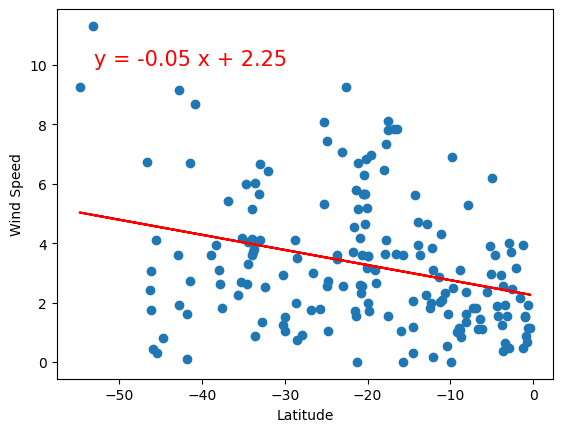

In [59]:
# Southern Hemisphere
x_axis = southern_hemi_df ["Lat"]
y_axis = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_axis,y_axis, 'Wind Speed', (-53,10))

**Discussion about the linear relationship:** There is a weak correlation between latitude and wind speed both in Northern Hemisphere and Southern Hemisphere.